In [117]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
#from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
#import itertools
#from keras.layers import LSTM
#from keras.layers import convolutional
#from keras.layers.convolutional import MaxPooling1D
#from keras.layers import Dropout



In [118]:
data = pd.read_csv(r"C:\Users\chint\Desktop\STUDY\AI\Project_New.csv")

In [119]:
data


,Timestamp,Irradiation horizontal,Irradiation vertical,Humidity outside,Temperature outside,El. Energy Heating/Cooling,El. Energy Heating/Cooling(cumulative),El. Energy house,El. Energy house(cumulative),PV generation,PV generation(cumulative),From grid,From grid(cumulative),To grid,To grid(cumulative)
0,01.01.2020 00:00:00,10.318919,6.182158,75.287622,-0.402457,0.166755,41067.03129,1.0,1116500.7,0.00,101357.08,1.33,340437.57,0.0,91483.71
1,01.01.2020 01:00:00,10.318919,6.182158,80.022013,-1.082696,0.169691,41067.20098,1.2,1116501.9,0.00,101357.08,1.32,340438.89,0.0,91483.71
2,01.01.2020 02:00:00,10.318919,6.182158,81.353654,-0.889972,0.163549,41067.36453,1.2,1116503.1,0.00,101357.08,1.35,340440.24,0.0,91483.71
3,01.01.2020 03:00:00,10.022490,6.046182,82.054028,-1.018735,0.163930,41067.52846,0.9,1116504.0,0.00,101357.08,1.35,340441.59,0.0,91483.71
4,01.01.2020 04:00:00,2.803804,2.734858,83.898655,-1.792509,0.135606,41067.66406,1.2,1116505.2,0.00,101357.08,1.29,340442.88,0.0,91483.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20299,25.04.2022 19:00:00,16.740953,8.562750,74.930428,11.120561,6.768286,66254.09521,0.3,1132602.0,1.46,210118.02,7.17,375408.24,0.0,179548.95
20300,25.04.2022 20:00:00,3.251666,2.813476,77.314410,10.283217,0.269863,66254.36507,1.2,1132603.2,0.56,210118.58,1.83,375410.07,0.0,179548.95
20301,25.04.2022 21:00:00,2.817507,2.816310,77.276611,9.335223,0.214297,66254.57937,1.8,1132605.0,0.00,210118.58,2.01,375412.08,0.0,179548.95
20302,25.04.2022 22:00:00,2.828299,2.821060,79.573240,9.218036,0.232787,66254.81216,1.8,1132606.8,0.00,210118.58,2.10,375414.18,0.0,179548.95


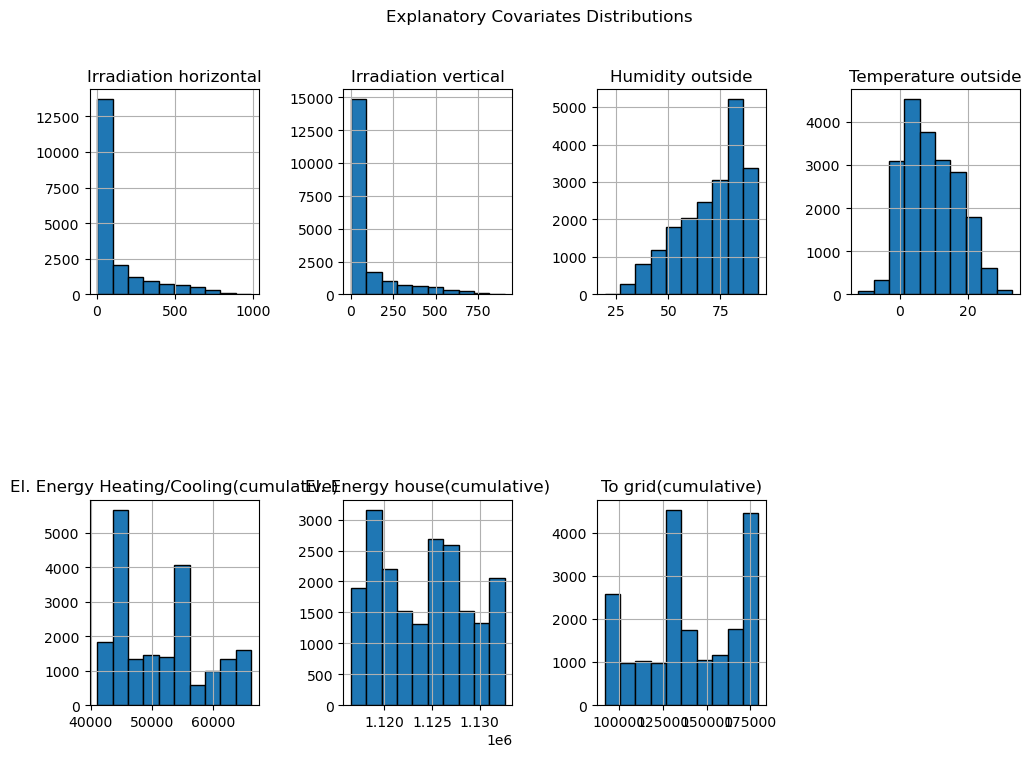

In [120]:
# Explanatory covariates
covariates = ['Irradiation horizontal', 'Irradiation vertical', 'Humidity outside', 'Temperature outside', 'El. Energy Heating/Cooling(cumulative)', 'El. Energy house(cumulative)', 'To grid(cumulative)']
covariates_data = data[covariates]

# Basic Statistical Analysis of the covariates
covariates_distributions = covariates_data.hist(figsize=(12, 8), bins=10, layout=(2, 4), edgecolor='black')
# Add spacing between subplots
plt.subplots_adjust(hspace=1, wspace=0.5)
# Customize other plot settings as needed
plt.suptitle('Explanatory Covariates Distributions')
plt.show()

In [121]:
# Split timestamp into separate date and time columns
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d.%m.%Y %H:%M:%S')
data['date'] = data['Timestamp'].dt.date
data['time'] = data['Timestamp'].dt.time

In [122]:
data


,Timestamp,Irradiation horizontal,Irradiation vertical,Humidity outside,Temperature outside,El. Energy Heating/Cooling,El. Energy Heating/Cooling(cumulative),El. Energy house,El. Energy house(cumulative),PV generation,PV generation(cumulative),From grid,From grid(cumulative),To grid,To grid(cumulative),date,time
0,2020-01-01 00:00:00,10.318919,6.182158,75.287622,-0.402457,0.166755,41067.03129,1.0,1116500.7,0.00,101357.08,1.33,340437.57,0.0,91483.71,2020-01-01,00:00:00
1,2020-01-01 01:00:00,10.318919,6.182158,80.022013,-1.082696,0.169691,41067.20098,1.2,1116501.9,0.00,101357.08,1.32,340438.89,0.0,91483.71,2020-01-01,01:00:00
2,2020-01-01 02:00:00,10.318919,6.182158,81.353654,-0.889972,0.163549,41067.36453,1.2,1116503.1,0.00,101357.08,1.35,340440.24,0.0,91483.71,2020-01-01,02:00:00
3,2020-01-01 03:00:00,10.022490,6.046182,82.054028,-1.018735,0.163930,41067.52846,0.9,1116504.0,0.00,101357.08,1.35,340441.59,0.0,91483.71,2020-01-01,03:00:00
4,2020-01-01 04:00:00,2.803804,2.734858,83.898655,-1.792509,0.135606,41067.66406,1.2,1116505.2,0.00,101357.08,1.29,340442.88,0.0,91483.71,2020-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20299,2022-04-25 19:00:00,16.740953,8.562750,74.930428,11.120561,6.768286,66254.09521,0.3,1132602.0,1.46,210118.02,7.17,375408.24,0.0,179548.95,2022-04-25,19:00:00
20300,2022-04-25 20:00:00,3.251666,2.813476,77.314410,10.283217,0.269863,66254.36507,1.2,1132603.2,0.56,210118.58,1.83,375410.07,0.0,179548.95,2022-04-25,20:00:00
20301,2022-04-25 21:00:00,2.817507,2.816310,77.276611,9.335223,0.214297,66254.57937,1.8,1132605.0,0.00,210118.58,2.01,375412.08,0.0,179548.95,2022-04-25,21:00:00
20302,2022-04-25 22:00:00,2.828299,2.821060,79.573240,9.218036,0.232787,66254.81216,1.8,1132606.8,0.00,210118.58,2.10,375414.18,0.0,179548.95,2022-04-25,22:00:00


In [123]:
data.dtypes


Timestamp                                 datetime64[ns]
Irradiation horizontal                           float64
Irradiation vertical                             float64
Humidity outside                                 float64
Temperature outside                              float64
El. Energy Heating/Cooling                       float64
El. Energy Heating/Cooling(cumulative)           float64
El. Energy house                                 float64
El. Energy house(cumulative)                     float64
PV generation                                    float64
PV generation(cumulative)                        float64
From grid                                        float64
From grid(cumulative)                            float64
To grid                                          float64
To grid(cumulative)                              float64
date                                              object
time                                              object
dtype: object

In [124]:
# Convert 'date' column to datetime data type
data['date'] = pd.to_datetime(data['date'])

# Convert 'time' column to datetime data type (combine with a fixed date to create a datetime)
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time

In [125]:
data.dtypes


Timestamp                                 datetime64[ns]
Irradiation horizontal                           float64
Irradiation vertical                             float64
Humidity outside                                 float64
Temperature outside                              float64
El. Energy Heating/Cooling                       float64
El. Energy Heating/Cooling(cumulative)           float64
El. Energy house                                 float64
El. Energy house(cumulative)                     float64
PV generation                                    float64
PV generation(cumulative)                        float64
From grid                                        float64
From grid(cumulative)                            float64
To grid                                          float64
To grid(cumulative)                              float64
date                                      datetime64[ns]
time                                              object
dtype: object

In [126]:
# Reorder the columns with 'date' and 'time' at the beginning
data = data.reindex(columns=['date', 'time'] + list(data.columns[:-2]))

data = data.drop('Timestamp', axis=1)


In [127]:
data


,date,time,Irradiation horizontal,Irradiation vertical,Humidity outside,Temperature outside,El. Energy Heating/Cooling,El. Energy Heating/Cooling(cumulative),El. Energy house,El. Energy house(cumulative),PV generation,PV generation(cumulative),From grid,From grid(cumulative),To grid,To grid(cumulative)
0,2020-01-01,00:00:00,10.318919,6.182158,75.287622,-0.402457,0.166755,41067.03129,1.0,1116500.7,0.00,101357.08,1.33,340437.57,0.0,91483.71
1,2020-01-01,01:00:00,10.318919,6.182158,80.022013,-1.082696,0.169691,41067.20098,1.2,1116501.9,0.00,101357.08,1.32,340438.89,0.0,91483.71
2,2020-01-01,02:00:00,10.318919,6.182158,81.353654,-0.889972,0.163549,41067.36453,1.2,1116503.1,0.00,101357.08,1.35,340440.24,0.0,91483.71
3,2020-01-01,03:00:00,10.022490,6.046182,82.054028,-1.018735,0.163930,41067.52846,0.9,1116504.0,0.00,101357.08,1.35,340441.59,0.0,91483.71
4,2020-01-01,04:00:00,2.803804,2.734858,83.898655,-1.792509,0.135606,41067.66406,1.2,1116505.2,0.00,101357.08,1.29,340442.88,0.0,91483.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20299,2022-04-25,19:00:00,16.740953,8.562750,74.930428,11.120561,6.768286,66254.09521,0.3,1132602.0,1.46,210118.02,7.17,375408.24,0.0,179548.95
20300,2022-04-25,20:00:00,3.251666,2.813476,77.314410,10.283217,0.269863,66254.36507,1.2,1132603.2,0.56,210118.58,1.83,375410.07,0.0,179548.95
20301,2022-04-25,21:00:00,2.817507,2.816310,77.276611,9.335223,0.214297,66254.57937,1.8,1132605.0,0.00,210118.58,2.01,375412.08,0.0,179548.95
20302,2022-04-25,22:00:00,2.828299,2.821060,79.573240,9.218036,0.232787,66254.81216,1.8,1132606.8,0.00,210118.58,2.10,375414.18,0.0,179548.95


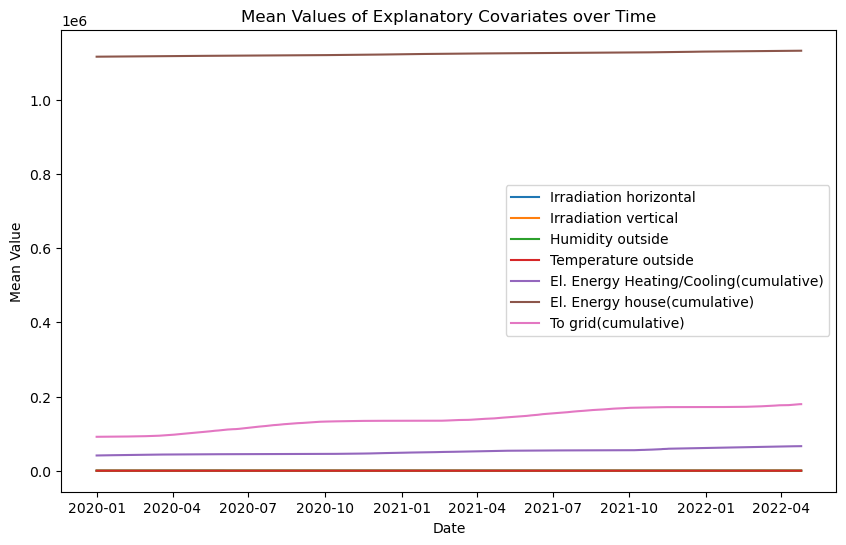

In [128]:
# Basic Statistical Analysis of the covariates

# Group data by 'date' column and calculate mean for each covariate
mean_values = data.groupby('date')[covariates].mean()

# Plot mean values for each covariate
fig, ax = plt.subplots(figsize=(10, 6))
for covariate in covariates:
    ax.plot(mean_values.index, mean_values[covariate], label=covariate)

# Customize the plot
ax.set_title('Mean Values of Explanatory Covariates over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')
ax.legend()

plt.show()

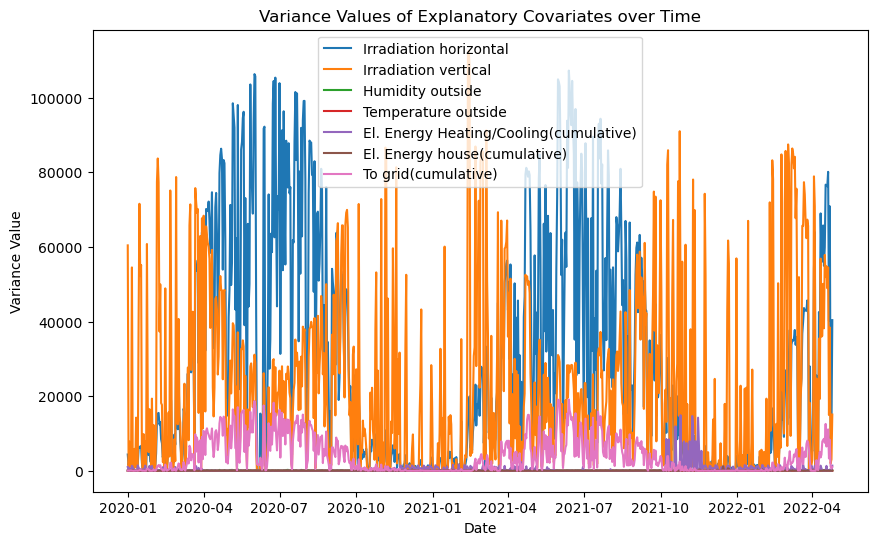

In [129]:
# Basic Statistical Analysis of the covariates

# Group data by 'date' column and calculate variance for each covariate
variance_values = data.groupby('date')[covariates].var()

# Plot variance values for each covariate
fig, ax = plt.subplots(figsize=(10, 6))
for covariate in covariates:
    ax.plot(variance_values.index, variance_values[covariate], label=covariate)

# Customize the plot
ax.set_title('Variance Values of Explanatory Covariates over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Variance Value')
ax.legend()

plt.show()

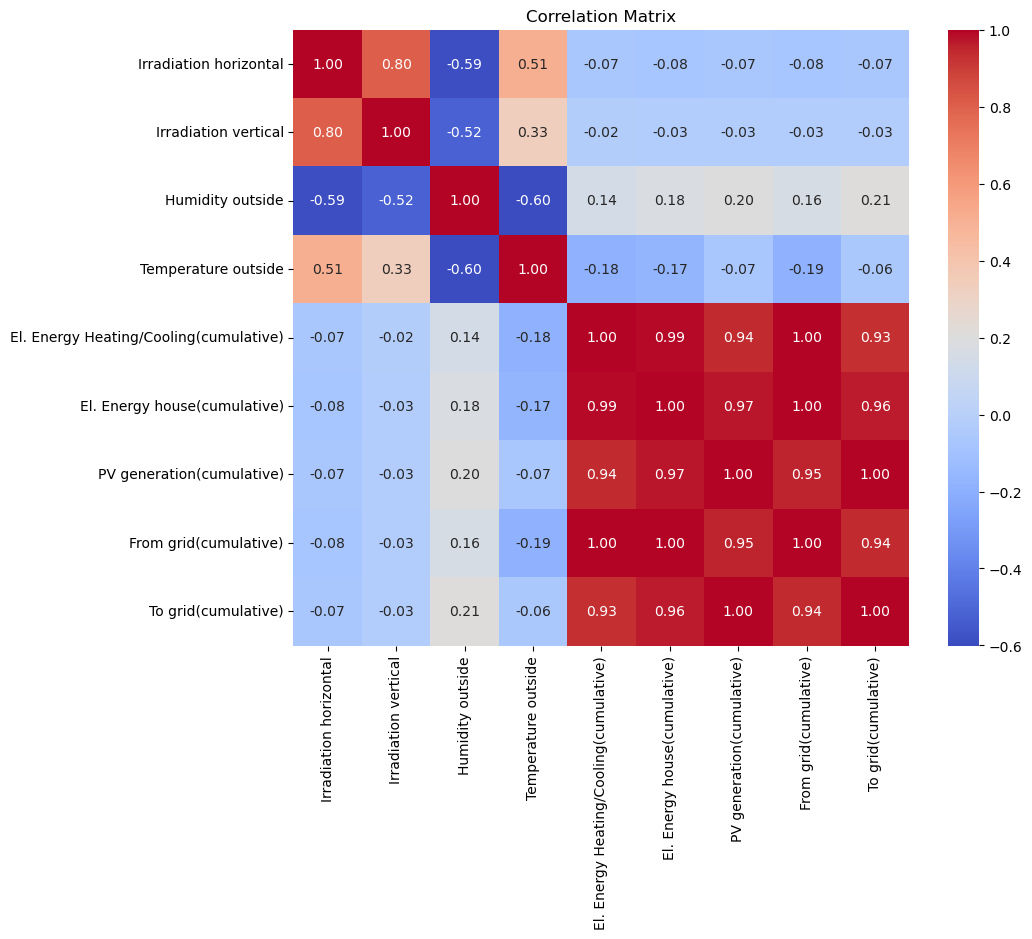

In [130]:
# Select the relevant columns
selected_columns = ['date', 'time', 'Irradiation horizontal', 'Irradiation vertical', 'Humidity outside',
                    'Temperature outside', 'El. Energy Heating/Cooling(cumulative)', 'El. Energy house(cumulative)',
                    'PV generation(cumulative)', 'From grid(cumulative)', 'To grid(cumulative)']
selected_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

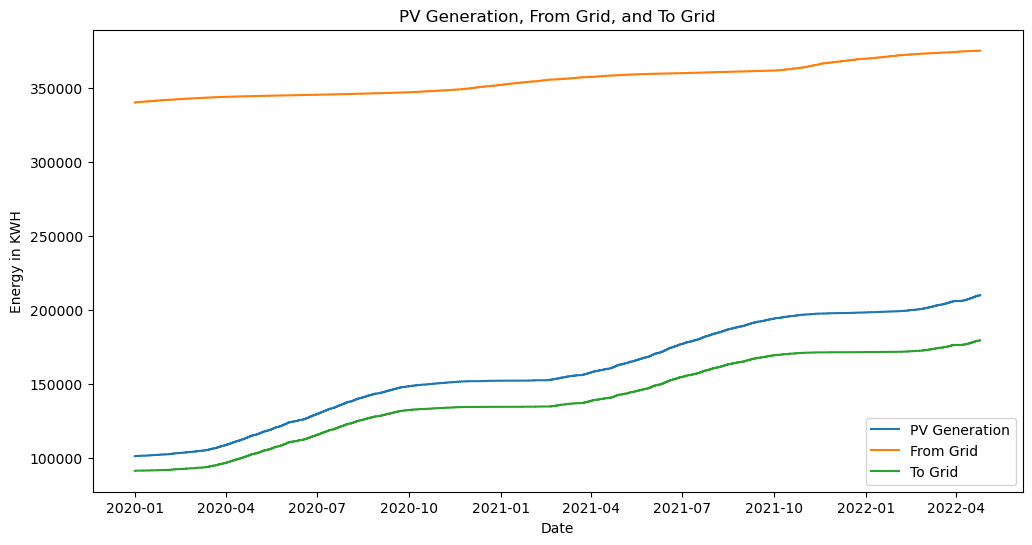

In [131]:
#Data Visualization

# Extract the variables for plotting
date = data['date']
pv_generation = data['PV generation(cumulative)']
from_grid = data['From grid(cumulative)']
to_grid = data['To grid(cumulative)']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(date, pv_generation, label='PV Generation')
plt.plot(date, from_grid, label='From Grid')
plt.plot(date, to_grid, label='To Grid')

# Customize the plot
plt.title('PV Generation, From Grid, and To Grid')
plt.xlabel('Date')
plt.ylabel('Energy in KWH')
plt.legend()

# Display the plot
plt.show()

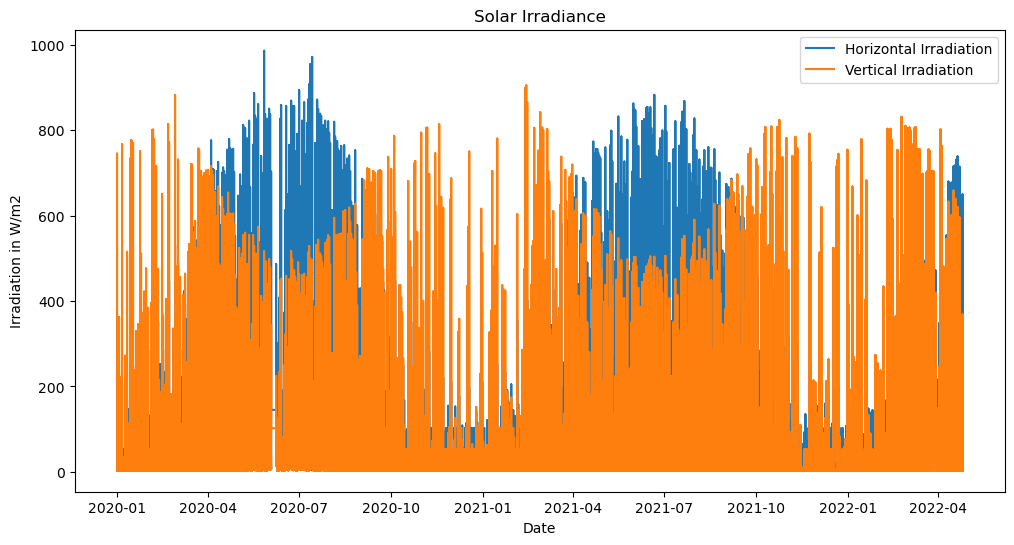

In [132]:
# Extract the variables for plotting
date = data['date']
horizontal_irradiance = data['Irradiation horizontal']
vertical_irradiance = data['Irradiation vertical']

# Plot the variables
plt.figure(figsize=(12, 6))
plt.plot(date, horizontal_irradiance, label='Horizontal Irradiation')
plt.plot(date, vertical_irradiance, label='Vertical Irradiation')
plt.title('Solar Irradiance')
plt.xlabel('Date')
plt.ylabel('Irradiation in W/m2')
plt.legend()
plt.show()

In [133]:
data['surplus'] = data['PV generation(cumulative)'] - data['From grid(cumulative)']

data['surplus']


0       -239080.49
1       -239081.81
2       -239083.16
3       -239084.51
4       -239085.80
           ...    
20299   -165290.22
20300   -165291.49
20301   -165293.50
20302   -165295.60
20303   -165297.73
Name: surplus, Length: 20304, dtype: float64

# Split the dataset into training and testing sets
X = data[['Irradiation horizontal', 'Irradiation vertical', 'Humidity outside', 'Temperature outside', 'El. Energy Heating/Cooling(cumulative)', 'El. Energy house(cumulative)', 'To grid(cumulative)']]  # Input variables
y = data['surplus']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [138]:
# Define the train_size and test_size based on the desired split percentage
train_size = int(0.8 * len(data))
test_size = len(data) - train_size

# Split the data while including all input variables in the training data
train_data = data.iloc[:train_size, :]
test_data = data.iloc[train_size:, :]

# Separate the input variables (features) and the target variable (surplus) in the train and test datasets
train_features = train_data[['Irradiation horizontal', 'Irradiation vertical', 'Humidity outside', 'Temperature outside', 'El. Energy Heating/Cooling(cumulative)', 'El. Energy house(cumulative)', 'To grid(cumulative)']]
train_target = train_data['surplus']

test_features = test_data[['Irradiation horizontal', 'Irradiation vertical', 'Humidity outside', 'Temperature outside', 'El. Energy Heating/Cooling(cumulative)', 'El. Energy house(cumulative)', 'To grid(cumulative)']]
test_target = test_data['surplus']

In [139]:
from arch import arch_model
from pydlm import dlm, trend, seasonality

In [142]:
# Hyperparameter Tuning
best_rmse = float('inf')
best_garch_params = None

# Define the range of values for p and q to try
p_values = range(1, 5)  # Change the range as needed
q_values = range(1, 5)  # Change the range as needed

for p in p_values:
    for q in q_values:
        # Fit the GARCH model
        garch_model = arch_model(train_target, vol='Garch', p=p, q=q)
        garch_result = garch_model.fit()

        # Forecast surplus using GARCH
        garch_forecast = garch_result.forecast(start=len(train_target), horizon=len(test_target))

        # Extract the mean values from the forecasted results
        garch_mean = garch_forecast.mean.iloc[-1]
        forecast_surplus = garch_mean

        # Calculate RMSE for this combination of p and q
        mse = np.mean((forecast_surplus - test_target)**2)
        rmse = np.sqrt(mse)

        # Update best parameters if this model has a lower RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_garch_params = (p, q)

if best_garch_params is not None:
    # Use the best parameters to fit the final GARCH model
    best_p, best_q = best_garch_params
    final_garch_model = arch_model(train_target, vol='Garch', p=best_p, q=best_q)
    final_garch_result = final_garch_model.fit()

    # Forecast surplus using the final GARCH model
    final_garch_forecast = final_garch_result.forecast(start=len(train_target), horizon=len(test_target))

    # Extract the mean values from the forecasted results
    final_garch_mean = final_garch_forecast.mean.iloc[-1]
    forecast_surplus = final_garch_mean

    # Convert the forecast_surplus list to a pandas DataFrame
    forecast_dates = test_target.index  # Assuming test_target's index contains the dates
    forecast_surplus_df = pd.DataFrame({'forecast': forecast_surplus}, index=forecast_dates)

    # Evaluate the model
    mse = np.mean((forecast_surplus_df['forecast'] - test_target)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(forecast_surplus_df['forecast'] - test_target))

    print("Best GARCH Parameters (p, q):", best_garch_params)
    print("Evaluation metrics:")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)

    # Plot the graph for the entire test set
    plt.figure(figsize=(12, 6))
    plt.plot(test_target, label='Actual')
    plt.plot(forecast_surplus_df['forecast'], label='Predicted')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Date')
    plt.ylabel('Energy in KWH')
    plt.legend()
    plt.show()
else:
    print("No suitable GARCH parameters found.")

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 550126.1931641095
Iteration:      2,   Func. Count:     12,   Neg. LLF: 173861.9180103724
Iteration:      3,   Func. Count:     17,   Neg. LLF: 173849.76237926754
Iteration:      4,   Func. Count:     22,   Neg. LLF: 173840.94949455812
Iteration:      5,   Func. Count:     27,   Neg. LLF: 173839.199767272
Iteration:      6,   Func. Count:     32,   Neg. LLF: 173827.9825354027
Iteration:      7,   Func. Count:     37,   Neg. LLF: 173769.98666415428
Iteration:      8,   Func. Count:     42,   Neg. LLF: 173484.87083680477
Iteration:      9,   Func. Count:     47,   Neg. LLF: 172365.49054797072
Iteration:     10,   Func. Count:     52,   Neg. LLF: 171885.65745653643
Iteration:     11,   Func. Count:     57,   Neg. LLF: 171827.36342052266
Iteration:     12,   Func. Count:     62,   Neg. LLF: 171826.6215557783
Iteration:     13,   Func. Count:     67,   Neg. LLF: 171826.60534851562
Iteration:     14,   Func. Count:     72,   Neg. LLF: 171

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      7,   Neg. LLF: 546932.8629476362
Iteration:      2,   Func. Count:     14,   Neg. LLF: 173861.98363987915
Iteration:      3,   Func. Count:     20,   Neg. LLF: 173849.5503673664
Iteration:      4,   Func. Count:     26,   Neg. LLF: 173839.84447946228
Iteration:      5,   Func. Count:     32,   Neg. LLF: 173837.63006602266
Iteration:      6,   Func. Count:     38,   Neg. LLF: 173824.39427965152
Iteration:      7,   Func. Count:     44,   Neg. LLF: 173758.0916666641
Iteration:      8,   Func. Count:     50,   Neg. LLF: 173435.95551616303
Iteration:      9,   Func. Count:     56,   Neg. LLF: 172238.23776643912
Iteration:     10,   Func. Count:     62,   Neg. LLF: 171858.48133026587
Iteration:     11,   Func. Count:     68,   Neg. LLF: 171826.91633583547
Iteration:     12,   Func. Count:     74,   Neg. LLF: 171826.5970656555
Iteration:     13,   Func. Count:     80,   Neg. LLF: 171826.59582463733
Iteration:     14,   Func. Count:     86,   Neg. LLF: 1

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 547708.8399213075
Iteration:      2,   Func. Count:     16,   Neg. LLF: 173862.11650265811
Iteration:      3,   Func. Count:     23,   Neg. LLF: 173849.30371141067
Iteration:      4,   Func. Count:     30,   Neg. LLF: 173838.79545317136
Iteration:      5,   Func. Count:     37,   Neg. LLF: 173836.12439045293
Iteration:      6,   Func. Count:     44,   Neg. LLF: 173820.8939730169
Iteration:      7,   Func. Count:     51,   Neg. LLF: 173745.17621297066
Iteration:      8,   Func. Count:     58,   Neg. LLF: 173381.26674182742
Iteration:      9,   Func. Count:     65,   Neg. LLF: 172112.14196228198
Iteration:     10,   Func. Count:     72,   Neg. LLF: 171841.53921216185
Iteration:     11,   Func. Count:     79,   Neg. LLF: 171826.723784897
Iteration:     12,   Func. Count:     86,   Neg. LLF: 171826.59363766838
Iteration:     13,   Func. Count:     93,   Neg. LLF: 171826.59351877423
Iteration:     14,   Func. Count:    100,   Neg. LLF: 1

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      9,   Neg. LLF: 551100.6954650118
Iteration:      2,   Func. Count:     18,   Neg. LLF: 173861.9749538122
Iteration:      3,   Func. Count:     26,   Neg. LLF: 173849.12364155252
Iteration:      4,   Func. Count:     34,   Neg. LLF: 173837.87304688786
Iteration:      5,   Func. Count:     42,   Neg. LLF: 173834.7981644236
Iteration:      6,   Func. Count:     50,   Neg. LLF: 173817.86525649842
Iteration:      7,   Func. Count:     58,   Neg. LLF: 173733.9693781177
Iteration:      8,   Func. Count:     66,   Neg. LLF: 173332.50104247156
Iteration:      9,   Func. Count:     74,   Neg. LLF: 172019.90024863262
Iteration:     10,   Func. Count:     82,   Neg. LLF: 171833.85764310922
Iteration:     11,   Func. Count:     90,   Neg. LLF: 171826.62298241357
Iteration:     12,   Func. Count:     98,   Neg. LLF: 171826.59095909115
Iteration:     13,   Func. Count:    106,   Neg. LLF: 171826.59094577262
Iteration:     14,   Func. Count:    114,   Neg. LLF: 1

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      7,   Neg. LLF: 545004.0116205432
Iteration:      2,   Func. Count:     14,   Neg. LLF: 173862.08898468642
Iteration:      3,   Func. Count:     20,   Neg. LLF: 173849.64199100033
Iteration:      4,   Func. Count:     26,   Neg. LLF: 173840.84830482048
Iteration:      5,   Func. Count:     32,   Neg. LLF: 173839.0772048296
Iteration:      6,   Func. Count:     38,   Neg. LLF: 173827.7504903991
Iteration:      7,   Func. Count:     44,   Neg. LLF: 173771.1703068005
Iteration:      8,   Func. Count:     50,   Neg. LLF: 173493.83111129884
Iteration:      9,   Func. Count:     56,   Neg. LLF: 172396.77639866935
Iteration:     10,   Func. Count:     62,   Neg. LLF: 171897.55843773467
Iteration:     11,   Func. Count:     68,   Neg. LLF: 171827.62002351694
Iteration:     12,   Func. Count:     74,   Neg. LLF: 171826.62516949174
Iteration:     13,   Func. Count:     80,   Neg. LLF: 171826.59809478454
Iteration:     14,   Func. Count:     86,   Neg. LLF: 1

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 543835.0868323275
Iteration:      2,   Func. Count:     16,   Neg. LLF: 173861.91673915635
Iteration:      3,   Func. Count:     23,   Neg. LLF: 173849.36655431625
Iteration:      4,   Func. Count:     30,   Neg. LLF: 173839.59028292954
Iteration:      5,   Func. Count:     37,   Neg. LLF: 173837.30934187223
Iteration:      6,   Func. Count:     44,   Neg. LLF: 173823.75823836122
Iteration:      7,   Func. Count:     51,   Neg. LLF: 173757.52933084173
Iteration:      8,   Func. Count:     58,   Neg. LLF: 173438.44575569063
Iteration:      9,   Func. Count:     65,   Neg. LLF: 172246.12046047766
Iteration:     10,   Func. Count:     72,   Neg. LLF: 171862.94195615035
Iteration:     11,   Func. Count:     79,   Neg. LLF: 171826.8549650954
Iteration:     12,   Func. Count:     86,   Neg. LLF: 171826.597220979
Iteration:     13,   Func. Count:     93,   Neg. LLF: 171826.5913585482
Iteration:     14,   Func. Count:    100,   Neg. LLF: 17

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      9,   Neg. LLF: 536252.3905017363
Iteration:      2,   Func. Count:     18,   Neg. LLF: 173862.465218523
Iteration:      3,   Func. Count:     26,   Neg. LLF: 173849.01687031178
Iteration:      4,   Func. Count:     34,   Neg. LLF: 173838.3818510541
Iteration:      5,   Func. Count:     42,   Neg. LLF: 173835.58085582318
Iteration:      6,   Func. Count:     50,   Neg. LLF: 173819.9900787731
Iteration:      7,   Func. Count:     58,   Neg. LLF: 173743.97677792344
Iteration:      8,   Func. Count:     66,   Neg. LLF: 173379.48153692516
Iteration:      9,   Func. Count:     74,   Neg. LLF: 172111.35687460128
Iteration:     10,   Func. Count:     82,   Neg. LLF: 171843.14780597374
Iteration:     11,   Func. Count:     90,   Neg. LLF: 171826.68577532968
Iteration:     12,   Func. Count:     98,   Neg. LLF: 171826.5916255707
Iteration:     13,   Func. Count:    106,   Neg. LLF: 171826.59666339407
Optimization terminated successfully    (Exit mode 0)
   

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     10,   Neg. LLF: 500440.37982320454
Iteration:      2,   Func. Count:     20,   Neg. LLF: 173863.224500675
Iteration:      3,   Func. Count:     29,   Neg. LLF: 173849.0858823064
Iteration:      4,   Func. Count:     38,   Neg. LLF: 173837.2857593739
Iteration:      5,   Func. Count:     47,   Neg. LLF: 173833.95599425235
Iteration:      6,   Func. Count:     56,   Neg. LLF: 173815.40667890752
Iteration:      7,   Func. Count:     65,   Neg. LLF: 173724.70127668744
Iteration:      8,   Func. Count:     74,   Neg. LLF: 173295.2419256654
Iteration:      9,   Func. Count:     83,   Neg. LLF: 171963.75023425388
Iteration:     10,   Func. Count:     92,   Neg. LLF: 171832.3321340165
Iteration:     11,   Func. Count:    101,   Neg. LLF: 171826.60779213093
Iteration:     12,   Func. Count:    110,   Neg. LLF: 171826.59337027246
Iteration:     13,   Func. Count:    119,   Neg. LLF: 171826.73250173757
Iteration:     14,   Func. Count:    129,   Neg. LLF: 171

C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 th

Iteration:      1,   Func. Count:      8,   Neg. LLF: 540615.9080445897
Iteration:      2,   Func. Count:     16,   Neg. LLF: 173862.15700362693
Iteration:      3,   Func. Count:     23,   Neg. LLF: 173849.79027154692
Iteration:      4,   Func. Count:     30,   Neg. LLF: 173840.84480998892
Iteration:      5,   Func. Count:     37,   Neg. LLF: 173839.0703115671
Iteration:      6,   Func. Count:     44,   Neg. LLF: 173827.56495187856
Iteration:      7,   Func. Count:     51,   Neg. LLF: 173769.17643479138
Iteration:      8,   Func. Count:     58,   Neg. LLF: 173482.07079513354
Iteration:      9,   Func. Count:     65,   Neg. LLF: 172357.91948411404
Iteration:     10,   Func. Count:     72,   Neg. LLF: 171887.03796182328
Iteration:     11,   Func. Count:     79,   Neg. LLF: 171827.78917664764
Iteration:     12,   Func. Count:     86,   Neg. LLF: 171826.69799455086
Iteration:     13,   Func. Count:     93,   Neg. LLF: 171826.5930001728
Iteration:     14,   Func. Count:    100,   Neg. LLF: 

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:      9,   Neg. LLF: 540458.7266302321
Iteration:      2,   Func. Count:     18,   Neg. LLF: 173861.91396932735
Iteration:      3,   Func. Count:     26,   Neg. LLF: 173849.35240103625
Iteration:      4,   Func. Count:     34,   Neg. LLF: 173839.49602190795
Iteration:      5,   Func. Count:     42,   Neg. LLF: 173837.18933636515
Iteration:      6,   Func. Count:     50,   Neg. LLF: 173823.49852389822
Iteration:      7,   Func. Count:     58,   Neg. LLF: 173756.71851466855
Iteration:      8,   Func. Count:     66,   Neg. LLF: 173434.2918919178
Iteration:      9,   Func. Count:     74,   Neg. LLF: 172236.45076210992
Iteration:     10,   Func. Count:     82,   Neg. LLF: 171860.7729591189
Iteration:     11,   Func. Count:     90,   Neg. LLF: 171826.81488800963
Iteration:     12,   Func. Count:     98,   Neg. LLF: 171826.59354303393
Iteration:     13,   Func. Count:    106,   Neg. LLF: 171826.5917818038
Iteration:     14,   Func. Count:    114,   Neg. LLF: 1

C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     10,   Neg. LLF: 549506.112843445
Iteration:      2,   Func. Count:     20,   Neg. LLF: 173861.76281829271
Iteration:      3,   Func. Count:     29,   Neg. LLF: 173848.96698877928
Iteration:      4,   Func. Count:     38,   Neg. LLF: 173838.10421180472
Iteration:      5,   Func. Count:     47,   Neg. LLF: 173835.23515853044
Iteration:      6,   Func. Count:     56,   Neg. LLF: 173819.27200234556
Iteration:      7,   Func. Count:     65,   Neg. LLF: 173741.69966255024
Iteration:      8,   Func. Count:     74,   Neg. LLF: 173369.65163392643
Iteration:      9,   Func. Count:     83,   Neg. LLF: 172091.7183475736
Iteration:     10,   Func. Count:     92,   Neg. LLF: 171838.4255786948
Iteration:     11,   Func. Count:    101,   Neg. LLF: 171826.71028803574
Iteration:     12,   Func. Count:    110,   Neg. LLF: 171826.59508969268
Iteration:     13,   Func. Count:    119,   Neg. LLF: 171826.63698663138
Iteration:     14,   Func. Count:    129,   Neg. LLF: 1

C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     11,   Neg. LLF: 534751.4655065201
Iteration:      2,   Func. Count:     22,   Neg. LLF: 173862.1844026185
Iteration:      3,   Func. Count:     32,   Neg. LLF: 173848.7780606486
Iteration:      4,   Func. Count:     42,   Neg. LLF: 173836.87595790403
Iteration:      5,   Func. Count:     52,   Neg. LLF: 173833.47254974244
Iteration:      6,   Func. Count:     62,   Neg. LLF: 173814.88925847327
Iteration:      7,   Func. Count:     72,   Neg. LLF: 173724.18966767582
Iteration:      8,   Func. Count:     82,   Neg. LLF: 173293.08264436372
Iteration:      9,   Func. Count:     92,   Neg. LLF: 171960.3038667721
Iteration:     10,   Func. Count:    102,   Neg. LLF: 171831.27525820603
Iteration:     11,   Func. Count:    112,   Neg. LLF: 171826.61497446522
Iteration:     12,   Func. Count:    122,   Neg. LLF: 171826.59133401894
Iteration:     13,   Func. Count:    131,   Neg. LLF: 171826.59136149727
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      9,   Neg. LLF: 529222.7905119155
Iteration:      2,   Func. Count:     18,   Neg. LLF: 173864.5763440309
Iteration:      3,   Func. Count:     26,   Neg. LLF: 173849.31525915966
Iteration:      4,   Func. Count:     34,   Neg. LLF: 173840.88827796245
Iteration:      5,   Func. Count:     42,   Neg. LLF: 173839.10598402773
Iteration:      6,   Func. Count:     50,   Neg. LLF: 173828.20003325515
Iteration:      7,   Func. Count:     58,   Neg. LLF: 173774.5819072667
Iteration:      8,   Func. Count:     66,   Neg. LLF: 173513.2399638864
Iteration:      9,   Func. Count:     74,   Neg. LLF: 172456.30605882936
Iteration:     10,   Func. Count:     82,   Neg. LLF: 171923.18477601564
Iteration:     11,   Func. Count:     90,   Neg. LLF: 171827.89897779294
Iteration:     12,   Func. Count:     98,   Neg. LLF: 171826.6088390721
Iteration:     13,   Func. Count:    106,   Neg. LLF: 171826.59651218832
Iteration:     14,   Func. Count:    114,   Neg. LLF: 17

C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     10,   Neg. LLF: 547479.082427508
Iteration:      2,   Func. Count:     20,   Neg. LLF: 173861.718154965
Iteration:      3,   Func. Count:     29,   Neg. LLF: 173849.26345344126
Iteration:      4,   Func. Count:     38,   Neg. LLF: 173839.4041524416
Iteration:      5,   Func. Count:     47,   Neg. LLF: 173837.0751344753
Iteration:      6,   Func. Count:     56,   Neg. LLF: 173823.44166348263
Iteration:      7,   Func. Count:     65,   Neg. LLF: 173756.9444715334
Iteration:      8,   Func. Count:     74,   Neg. LLF: 173436.4417533995
Iteration:      9,   Func. Count:     83,   Neg. LLF: 172241.13241043038
Iteration:     10,   Func. Count:     92,   Neg. LLF: 171863.32055078744
Iteration:     11,   Func. Count:    101,   Neg. LLF: 171826.93357626576
Iteration:     12,   Func. Count:    110,   Neg. LLF: 171826.59143036584
Iteration:     13,   Func. Count:    119,   Neg. LLF: 171826.59315356228
Iteration:     14,   Func. Count:    129,   Neg. LLF: 17182

C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     11,   Neg. LLF: 519435.0387813749
Iteration:      2,   Func. Count:     22,   Neg. LLF: 173864.20491004712
Iteration:      3,   Func. Count:     32,   Neg. LLF: 173848.6731764585
Iteration:      4,   Func. Count:     42,   Neg. LLF: 173838.14388703674
Iteration:      5,   Func. Count:     52,   Neg. LLF: 173835.24703390116
Iteration:      6,   Func. Count:     62,   Neg. LLF: 173819.42244003247
Iteration:      7,   Func. Count:     72,   Neg. LLF: 173742.13509638098
Iteration:      8,   Func. Count:     82,   Neg. LLF: 173372.32355498843
Iteration:      9,   Func. Count:     92,   Neg. LLF: 172096.28588540223
Iteration:     10,   Func. Count:    102,   Neg. LLF: 171841.74227810063
Iteration:     11,   Func. Count:    112,   Neg. LLF: 171826.66038968827
Iteration:     12,   Func. Count:    122,   Neg. LLF: 171826.59188358454
Iteration:     13,   Func. Count:    132,   Neg. LLF: 171826.5920842872
Iteration:     14,   Func. Count:    143,   Neg. LLF: 

C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\chint\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.529e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     12,   Neg. LLF: 516615.1393924278
Iteration:      2,   Func. Count:     24,   Neg. LLF: 173862.65242882876
Iteration:      3,   Func. Count:     35,   Neg. LLF: 173848.57386256967
Iteration:      4,   Func. Count:     46,   Neg. LLF: 173836.7113697316
Iteration:      5,   Func. Count:     57,   Neg. LLF: 173833.2277664749
Iteration:      6,   Func. Count:     68,   Neg. LLF: 173814.51292510136
Iteration:      7,   Func. Count:     79,   Neg. LLF: 173723.10002948547
Iteration:      8,   Func. Count:     90,   Neg. LLF: 173288.70715426252
Iteration:      9,   Func. Count:    101,   Neg. LLF: 171956.30982279463
Iteration:     10,   Func. Count:    112,   Neg. LLF: 171830.78745822853
Iteration:     11,   Func. Count:    123,   Neg. LLF: 171826.59597953653
Iteration:     12,   Func. Count:    134,   Neg. LLF: 171826.59571957335
Iteration:     13,   Func. Count:    146,   Neg. LLF: 171826.5958470882
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\chint\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


No suitable GARCH parameters found.
